# Linear regression
Linear regression model using scikit learn
<div stlye="text-align:center">
<img src="salary.png" width=75%>
</div>


In [48]:
salary_data='https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv'
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

style.use('ggplot') or plt.style.use('ggplot')
data = pd.read_csv(salary_data)


### Checking the data

In [9]:
data.head(5)


,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [17]:
print("Info:",data.info())
print("Shape:",data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes
Info: None
Shape: (40, 2)


### Separating features from label

In [20]:
X = data['Experience Years']
y = data.Salary

### Visualizing the data

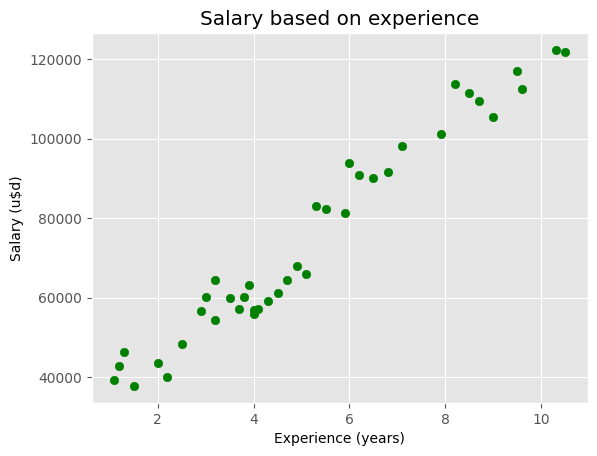

In [35]:
axes = plt.axes()
axes.scatter(x=X,y=y,c="green")
plt.title("Salary based on experience")
plt.ylabel("Salary (u$d)")
plt.xlabel("Experience (years)")
plt.show()

### Splitting train and test data

In [79]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
print("Shapes")
print("X_train:",X_train.shape)
print("X_test:", X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

Shapes
X_train: (32, 1)
X_test: (8, 1)
y_train: (32,)
y_test: (8,)


### Model
Using sklearn to create a linear regression model


In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Testing our model

In [81]:
model.score(X_test,y_test)

0.9068577573647874

### Normalizing data

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[0.36170213],
       [0.30851064],
       [0.30851064],
       [0.5212766 ],
       [0.09574468],
       [0.27659574],
       [0.90425532],
       [0.54255319]])

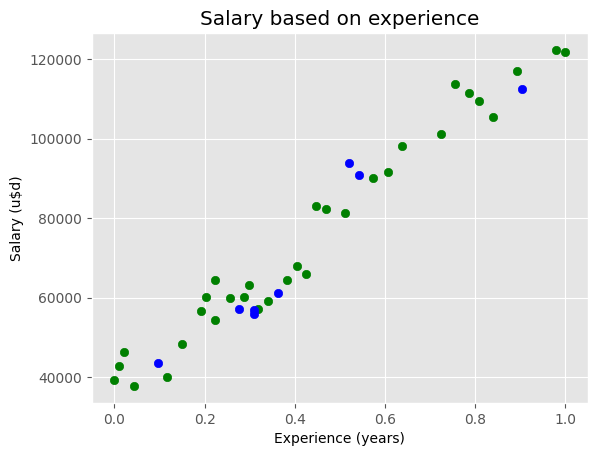

In [92]:
axes = plt.axes()
axes.scatter(x=X_train_scaled,y=y_train,c="green")
axes.scatter(x=X_test_scaled,y=y_test,c='blue')
plt.title("Salary based on experience")
plt.ylabel("Salary (u$d)")
plt.xlabel("Experience (years)")
plt.show()

In [93]:
model.fit(X_train_scaled,y_train)


LinearRegression()

In [94]:
model.score(X_test_scaled,y_test)

0.9068577573647874

In [103]:
values_to_predict = np.array([4,6,5,8,1,2,7.5,6.6]).reshape(-1,1)
values_to_predict_scaled = scaler.transform(values_to_predict)
predictions = model.predict(values_to_predict_scaled) 
predictions

array([ 64348.37526617,  83164.43781119,  73756.40653868, 101980.5003562 ,
        36124.28144865,  45532.31272116,  97276.48471994,  88809.25657469])

### Visualiting the prediction

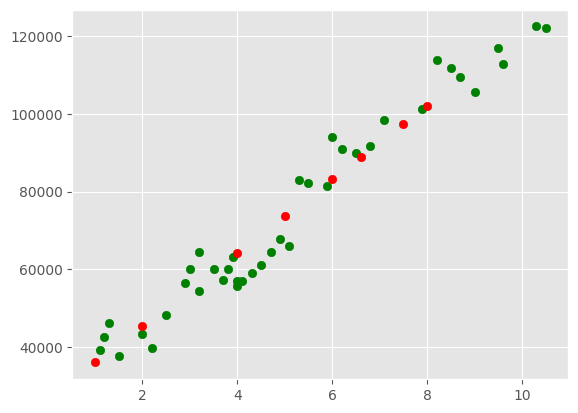

In [104]:
axes = plt.axes()
axes.scatter(X,y,c='green')
axes.scatter(values_to_predict,predictions,c='red')

### Conclusion
The model predicted a linear regression 